In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import missingno as msno

In [2]:
def plot_weekend(data,fecha1):
    fig, ax = plt.subplots(figsize=(12,4))

    fecha1 = parse(fecha1) - pd.Timedelta('1D')
    fecha2 = fecha1 + pd.Timedelta('4D')
    ax.set_xlim(fecha1,fecha2)

    ax.scatter(data.index,data.TCAire)

In [33]:
# Datos de mediciones de fin de semana
weekend_data = pd.read_csv('../data/weekends.csv',index_col=0,parse_dates=True)
weekend_data = weekend_data.resample("600S").interpolate(method='time')
#weekend_data

In [4]:
nombres = np.genfromtxt('../idf/cubiculo_original/cubiculo.csv',dtype='U',delimiter=',',max_rows=1,)
nombres

for i,nombre in enumerate(nombres):
    print(i,nombre)
    
nombres[0]  = 'tiempo'
nombres[1]  = 'To'
nombres[2]  = 'Ti'

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 THERMAL ZONE: JORGE:Zone Mean Air Temperature [C](TimeStep)


In [22]:
# Llamada de datos de e+
simulate = pd.read_csv('../idf/cubiculo_original/cubiculo.csv',names=nombres,skiprows=1)
simulate.tiempo = simulate.tiempo.str.replace('24:00:00','23:59:59')
simulate.tiempo = '2019-'+simulate.tiempo
simulate.tiempo = pd.to_datetime(simulate.tiempo,format='%Y- %m/%d %H:%M:%S')
simulate.tiempo = simulate.tiempo-pd.Timedelta('10minute')
simulate.set_index('tiempo',inplace=True)
# Hago columna de dias para hacer mascara (opcional)
#simulate['dia'] = simulate.index.day_of_week
# solo dines de semana de simulaciones
weekend_simu = simulate[simulate.index.day_of_week>=5]
#weekend_simu

In [23]:
data = pd.concat([weekend_data,weekend_simu],axis=1)
data

,TCAire,To,Ti
tiempo,,,
2019-05-04 00:00:00,NaN,25.4,26.720595
2019-05-04 00:10:00,NaN,25.0,26.803164
2019-05-04 00:20:00,NaN,24.9,26.684742
2019-05-04 00:30:00,NaN,24.6,26.455442
2019-05-04 00:40:00,NaN,24.7,26.396843
...,...,...,...
2019-07-28 23:10:00,25.432277,NaN,NaN
2019-07-28 23:20:00,24.818508,NaN,NaN
2019-07-28 23:30:00,24.905036,NaN,NaN


ValueError: x and y must be the same size

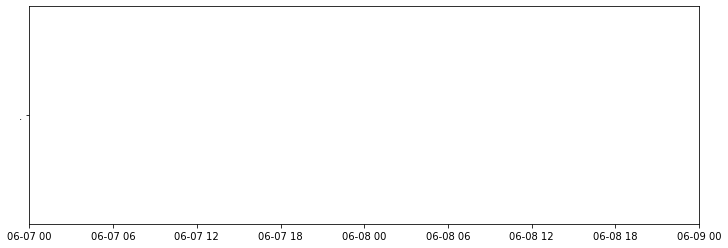

In [31]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08') - pd.Timedelta('1D')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.TCAire,'.',color='blue',label='Medición')
ax.scatter(data.Ti,'.',color='red',label='Simulación')
ax.set_title('Fin de semana 2019-06-08 para validación')
ax.legend()
ax.grid()

In [26]:
data.index

DatetimeIndex(['2019-05-04 00:00:00', '2019-05-04 00:10:00',
               '2019-05-04 00:20:00', '2019-05-04 00:30:00',
               '2019-05-04 00:40:00', '2019-05-04 00:50:00',
               '2019-05-04 01:00:00', '2019-05-04 01:10:00',
               '2019-05-04 01:20:00', '2019-05-04 01:30:00',
               ...
               '2019-07-28 22:20:00', '2019-07-28 22:30:00',
               '2019-07-28 22:40:00', '2019-07-28 22:50:00',
               '2019-07-28 23:00:00', '2019-07-28 23:10:00',
               '2019-07-28 23:20:00', '2019-07-28 23:30:00',
               '2019-07-28 23:40:00', '2019-07-28 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=8790, freq=None)